In [46]:
import os
import cv2
import numpy as np
import tensorflow as tf
#!unzip pubfig50

Archive:  pubfig50.zip
   creating: pubfig50/
   creating: pubfig50/Adam Sandler/
  inflating: pubfig50/Adam Sandler/103.jpg  
  inflating: pubfig50/Adam Sandler/108.jpg  
  inflating: pubfig50/Adam Sandler/11.jpg  
  inflating: pubfig50/Adam Sandler/111.jpg  
  inflating: pubfig50/Adam Sandler/114.jpg  
  inflating: pubfig50/Adam Sandler/116.jpg  
  inflating: pubfig50/Adam Sandler/119.jpg  
  inflating: pubfig50/Adam Sandler/127.jpg  
  inflating: pubfig50/Adam Sandler/132.jpg  
  inflating: pubfig50/Adam Sandler/134.jpg  
  inflating: pubfig50/Adam Sandler/136.jpg  
  inflating: pubfig50/Adam Sandler/14.jpg  
  inflating: pubfig50/Adam Sandler/149.jpg  
  inflating: pubfig50/Adam Sandler/151.jpg  
  inflating: pubfig50/Adam Sandler/152.jpg  
  inflating: pubfig50/Adam Sandler/157.jpg  
  inflating: pubfig50/Adam Sandler/161.jpg  
  inflating: pubfig50/Adam Sandler/165.jpg  
  inflating: pubfig50/Adam Sandler/166.jpg  
  inflating: pubfig50/Adam Sandler/17.jpg  
  inflating: pubfig50

In [0]:
# Run this cell to mount your Google Drive.
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
def get_image_flt(image_path):
    image = cv2.imread(image_path, -1)
    return image.flatten()

In [0]:
def get_subjects(dataset_path):
    return os.listdir(dataset_path)

In [0]:
def get_images(subject_path):
    return os.listdir(subject_path)

In [0]:
def read_data(dataset_path):
    data = np.zeros((8266, 100*100*3))
    labels = dict()
    index = 0
    
    subjects = get_subjects(dataset_path)
    #print(subjects)
    for subject in subjects:
        #print(subject)
        subject_path = dataset_path + "//" + subject
        image_list = get_images(subject_path)
        
        for image in image_list:
            image_path = subject_path + "//" + image
            data[index, :] = get_image_flt(image_path)
            labels[index] = subject
            index += 1
    
    return data, labels

In [0]:
def array_to_image(image):
    return np.reshape(image, (100,100,3))

In [0]:
dataset_path = "pubfig50/"
X, labels = read_data(dataset_path)

**Get data**

In [0]:
import pandas as pd
#labels = pd.read_csv('drive/My Drive/Colab Notebooks/labels.csv')
#y = list(labels.keys())
y = pd.DataFrame({"Target":list(labels.values())})

**Check sample image**

In [0]:
i = array_to_image(X[800,:])

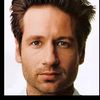

Target    David Duchovny
Name: 800, dtype: object

In [56]:
from google.colab.patches import cv2_imshow
cv2_imshow(i)

y.iloc[800,:]

**Encode Categorical Variable - Class**

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_encodings = y.apply(le.fit_transform)

**Train and Test Split**

In [58]:
len(labels)

8266

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encodings, test_size = 0.2, random_state = 42)

**Scaling Pixels**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Train
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Test
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

feature_columns = [tf.feature_column.numeric_column('x', shape = X_train_scaled.shape[1:])]


In [62]:
len(X_train_scaled)

6612

In [63]:
len(X_test_scaled)

1654

In [64]:
type(y_train)

pandas.core.frame.DataFrame

In [65]:
#y_train = y_train.as_matrix(columns = y_train['Target']
y_tr = y_train.values
type(y_tr)

numpy.ndarray

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
model.fit(X_train_scaled.reshape(len(X_train_scaled),100,100,3), y_train.values, epochs=3)

Epoch 1/3
6612/6612 [==============================] - 351s 53ms/step - loss: 3.7788 - acc: 0.1106
Epoch 2/3
6612/6612 [==============================] - 348s 53ms/step - loss: 2.0375 - acc: 0.4767
Epoch 3/3
6612/6612 [==============================] - 349s 53ms/step - loss: 0.5172 - acc: 0.8672


In [78]:
model.evaluate(X_test_scaled.reshape(len(X_test_scaled),100,100,3), y_test.values)

1654/1654 [==============================] - 18s 11ms/step


[3.766282263805385, 0.3270858524428025]